In [2]:
# load packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import pylev
import string

In [17]:
dict_ooi = {'BG': 0, 'IFU': 1, 'Grid': 2, 'Single Shape': 3, 'Block': 4}
transitions = [0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 3, 4, 4]

In [25]:
proportions = []
total_fixations = 14
for value in dict_ooi.values():
    occurence = transitions.count(value)
    proportions.append(occurence/total_fixations)
proportions

0.9999999999999998

In [53]:
# parse string into action list
liste = 'halll,oovello'
lise2 = liste[3:6].split
list_str = "['Cap Off', 'Apply Tip', 'Setting Units', 'Priming', 'Injection', 'Remove Tip', 'Cap On']"
tmp_list = list_str[1:-1].split(',')
tmp_list



["'Cap Off'",
 " 'Apply Tip'",
 " 'Setting Units'",
 " 'Priming'",
 " 'Injection'",
 " 'Remove Tip'",
 " 'Cap On'"]

In [54]:
tmp_list_2 = [(elem[1:] if elem[0] == ' ' else elem) for elem in tmp_list]
tmp_list_2

["'Cap Off'",
 "'Apply Tip'",
 "'Setting Units'",
 "'Priming'",
 "'Injection'",
 "'Remove Tip'",
 "'Cap On'"]

In [55]:
action_list = [(elem[1:-1]) for elem in tmp_list_2]
action_list

['Cap Off',
 'Apply Tip',
 'Setting Units',
 'Priming',
 'Injection',
 'Remove Tip',
 'Cap On']

In [47]:
action_list = [(elem[1:-1] if elem[0] == "'" else elem) for elem in tmp_list]
action_list

['Cap Off',
 " 'Apply Tip'",
 " 'Setting Units'",
 " 'Priming'",
 " 'Injection'",
 " 'Remove Tip'",
 " 'Cap On'"]

['Cap Off',
 " 'Apply Tip'",
 " 'Setting Units'",
 " 'Priming'",
 " 'Injection'",
 " 'Remove Tip'",
 " 'Cap On'"]

In [4]:
start_time = [x for x in range(2.5,112.5,5)]
type(start_time)

TypeError: 'float' object cannot be interpreted as an integer

In [25]:
timebins = np.arange(2.5,117.5,5)

In [26]:
kcoeff = [0.726165908,
0.911650339,
0.698886142,
0.099087276,
-0.088591147,
-0.407143435,
0.41495672,
0.289968061,
0.095451399,
-0.503914694,
0.021002179,
0.39407282,
-0.02809028,
-0.599790504,
0.412455876,
0.405130352,
0.709937242,
0.418415578,
0.225357399,
0.118162963,
0.314083249,
0.826733369,
1.593262246]


In [27]:
zipped = list(zip(timebins, kcoeff))

In [1]:
timebins = [x for x in range(0,115,5)]
kcoeff = [0.726165908,
0.911650339,
0.698886142,
0.099087276,
-0.088591147,
-0.407143435,
0.41495672,
0.289968061,
0.095451399,
-0.503914694,
0.021002179,
0.39407282,
-0.02809028,
-0.599790504,
0.412455876,
0.405130352,
0.709937242,
0.418415578,
0.225357399,
0.118162963,
0.314083249,
0.826733369,
1.593262246]



TypeError: 'float' object cannot be interpreted as an integer

In [31]:
df = pd.DataFrame(zipped, columns=['start_time', 'K-coefficient'])
df

,start_time,K-coefficient
0,5,0.818908
1,15,0.398987
2,25,-0.247867
3,35,0.352462
4,45,-0.204232
5,55,0.207537
6,65,-0.313940
7,75,0.408793
8,85,0.564176
9,95,0.171760


c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


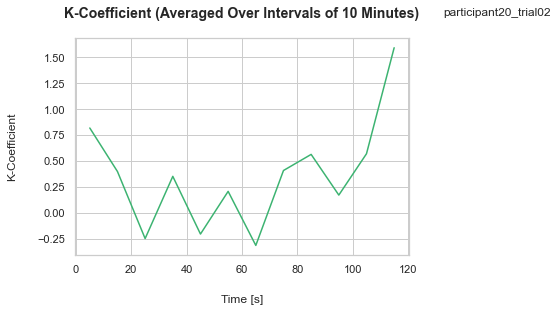

<Figure size 432x288 with 0 Axes>

In [32]:
savepath='K-Coefficient_averaged_10min'
sns.set_theme(style='whitegrid')
lineplot = sns.lineplot(df['start_time'], df['K-coefficient'], color='mediumseagreen')
plt.title('K-Coefficient (Averaged Over Intervals of 10 Minutes)', fontsize = 14, pad = 20, weight = 'bold')
plt.text(1.1,1.1, 'participant20_trial02', transform=plt.gca().transAxes)
plt.ylabel('K-Coefficient',  labelpad=20)
plt.xlabel('Time [s]',  labelpad=20)
fig = lineplot.get_figure()
plt.show()
fig.savefig(savepath, bbox_inches='tight', dpi=300)
plt.clf()


In [30]:
#timebins = [x for x in range(0,115,10)]
timebins = np.arange(5,125,10)
kcoeff = [0.818908123,
0.398986709,
-0.247867291,
0.35246239,
-0.204231648,
0.207537499,
-0.313940396,
0.408793114,
0.56417641,
0.171760181,
0.570408309,
1.593262246]

zipped = list(zip(timebins, kcoeff))

#### result summary

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import cv2
from fpdf import FPDF
ui_output_path = 'Output'
output_path = Path(ui_output_path)

In [117]:
# find aspect ratio of image
img = cv2.imread('Output/ooi_analysis/visualisations/Hits per OOI_barplot_Whole Trial.png')
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio

1397
2175
1.556907659269864
124.55261274158913


In [18]:
img_path = output_path / 'ooi_analysis' / 'visualisations' / 'Hits per OOI_barplot_Whole Trial.png'
img_hits_per_ooi = image.imread(img_path)
img_path = output_path / 'ooi_analysis' / 'visualisations' / 'Time to First Fixation [ms] per OOI_barplot_Whole Trial.png'
img_first_fix_ooi = image.imread(img_path)
img_path = output_path / 'ooi_analysis' / 'visualisations' / 'Relative Dwelltime [%] per OOI_piechart_Whole Trial.png'
img_rel_dwelltime_ooi = image.imread(img_path)
#plt.imshow(img_hits_per_ooi)

## somehow fpdf does not work with windowspath!



In [15]:
testimage = image.imread('testimage.jpg')

In [2]:
pdf = FPDF()
pdf.add_page()
pdf.set_xy(0.0,0.0)
pdf.image( 'Output/ooi_analysis/visualisations/Hits per OOI_barplot_Whole Trial.png',link='', type='', h = 50)
pdf.output('testimageee.pdf', 'F')

NameError: name 'FPDF' is not defined

In [4]:
### SUMMARY OF GAZE ANALYSIS: ALL GROUPS

pdf = FPDF(unit='mm')
pdf.add_page()

# set title of the document
pdf.set_font('Arial', 'B', 18)
pdf.set_xy(10,10)
pdf.cell(190, 20, 'Summary of Gaze Analysis - All Groups', 1, 1, 'C')

### set sub-title of analysis: attention
pdf.set_font('Arial', 'B', 16)
pdf.set_xy(10,35)
pdf.cell(190,10, txt='1) Attention / Object of Interest-based Analysis', align='C')



### first metric: hits per OOI
img_path = 'Output/ooi_analysis/visualisations/Hits per OOI_barplot_Whole Trial.png'

# title of metric
pdf.set_font('Arial', 'B', 12)
pdf.set_xy(10,45)
pdf.cell(190,10, align = 'L', txt='Hits per OOI')

# description
pdf.set_font('Arial', '', 12)
pdf.set_xy(10,55)
pdf.multi_cell(190, 5 , align = 'L', txt='The amount of fixations that were identified on the respective object of interest. In general, the more hits an object has, the higher its importance.')

# image
# place image
pdf.set_xy(10,70) 
pdf.image(img_path, link='', type='PNG', h = 80) 
# calculate image width from ration and place frame
img = cv2.imread(img_path)
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio
pdf.set_xy(10,70) 
pdf.cell(w=img_w, h=80, border=1)



### second metric: time to first fixation
img_path =  'Output/ooi_analysis/visualisations/Time to First Fixation [ms] per OOI_barplot_Whole Trial.png'

# title of metric
pdf.set_font('Arial', 'B', 12)
pdf.set_xy(10,160)
pdf.cell(190,10, align = 'L', txt='Time to First Fixation [ms] per OOI')

# description
pdf.set_font('Arial', '', 12)
pdf.set_xy(10,170)
pdf.multi_cell(190, 5 , align = 'L', txt='The average time in miliseconds until the first fixation on a specific object took place. In general, the less time passes until the object is noticed, the higher its importance or the more noticeable it is.')


# image
# place image
pdf.set_xy(10,185) 
pdf.image(img_path, link='', type='PNG', h = 80) 
# calculate image width from ration and place frame
img = cv2.imread(img_path)
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio
pdf.set_xy(10,185) 
pdf.cell(w=img_w, h=80, border=1)



### third metric: Relative Dwelltime [%] per OOI
img_path =  'Output/ooi_analysis/visualisations/Relative Dwelltime [%] per OOI_piechart_Whole Trial.png'

# new page
pdf.add_page()

# title of metric
pdf.set_font('Arial', 'B', 12)
pdf.set_xy(10,10)
pdf.cell(190,10, align = 'L', txt='Relative Dwelltime [%] per OOI')

# description
pdf.set_font('Arial', '', 12)
pdf.set_xy(10,20)
pdf.multi_cell(190, 5 , align = 'L', txt='The relative amount of time the participants\' gaze was focused on each OOI. In general, the higher the percentage of dwell time, the higher the objects\' importance.')

# image
# place image
pdf.set_xy(10,35) 
pdf.image(img_path, link='', type='PNG', h = 80) 
# calculate image width from ration and place frame
img = cv2.imread(img_path)
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio
pdf.set_xy(10,35) 
pdf.cell(w=img_w, h=80, border=1)



# fourth metric: Average Fixation Time [ms] per OOI_barplot_Whole Trial.png
img_path =  'Output/ooi_analysis/visualisations/Average Fixation Time [ms] per OOI_barplot_Whole Trial.png'

# title of metric
pdf.set_font('Arial', 'B', 12)
pdf.set_xy(10,125)
pdf.cell(190,10, align = 'L', txt='Relative Dwelltime [%] per OOI')

# description
pdf.set_font('Arial', '', 12)
pdf.set_xy(10,135)
pdf.multi_cell(190, 5 , align = 'L', txt='The average duration of a fixation on each OOI. Generally, higher fixation durations are associated with more focus and concentration. (?)')

# image
# place image
pdf.set_xy(10,150) 
pdf.image(img_path, link='', type='PNG', h = 80) 
# calculate image width from ration and place frame
img = cv2.imread(img_path)
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio
pdf.set_xy(10,150) 
pdf.cell(w=img_w, h=80, border=1)




# new analysis: focus
pdf.add_page()

# title
pdf.set_font('Arial', 'B', 16)
pdf.set_xy(10,20)
pdf.cell(190,10, txt='2) Focus', align='C')


# title of metric
pdf.set_font('Arial', 'B', 12)
pdf.set_xy(10,35)
pdf.cell(190,10, align = 'L', txt='Hits per OOI')

# description
pdf.set_font('Arial', '', 12)
pdf.set_xy(10,45)
pdf.multi_cell(190, 5 , align = 'L', txt='The amount of fixations that were identified on the respective object of interest. In general, the more hits an object has, the higher its importance.')

# image
# place image
pdf.set_xy(10,60) 
pdf.image(img_path, link='', type='PNG', h = 80) 
# calculate image width from ration and place frame
img = cv2.imread(img_path)
h, w, c = img.shape
wh_ratio = w/h
img_w = 80*wh_ratio
pdf.set_xy(10,60) 
pdf.cell(w=img_w, h=80, border=1)



pdf.output('testpdf_2.pdf', 'F')

''

#### edit distance algorithm

In [22]:
alphabet = string.ascii_lowercase
alphabet

'abcdefghijklmnopqrstuvwxyz'

In [23]:
trial_seq = ["hello", "at" , "test" , "this" , "here" , "now" ]
opt_seq = ['hello', 'test', 'here', 'now', 'hello', 'bye']
string_list = trial_seq + opt_seq
string_set_unique = set(string_list)
string_list_unique = list(string_set_unique)

['bye', 'this', 'here', 'test', 'at', 'hello', 'now']

In [24]:
dict_actions = { string_list_unique[i] : alphabet[i] for i in range(0, len(string_list_unique) ) }
dict_actions

{'bye': 'a',
 'this': 'b',
 'here': 'c',
 'test': 'd',
 'at': 'e',
 'hello': 'f',
 'now': 'g'}

In [29]:
trial_seq_list = list(map(dict_actions.get, trial_seq))
trial_seq_string = ''.join(trial_seq_list)
opt_seq_list = list(map(dict_actions.get, opt_seq))
opt_seq_string = ''.join(opt_seq_list)
opt_seq_string



'fdcgfa'

In [31]:
distance = pylev.levenshtein(trial_seq_string, opt_seq_string)
distance

4

In [8]:
number_figs = 6

if number_figs % 3 == 0:
    figure_rows = number_figs / 3
else:
    figure_rows = int(number_figs / 3) + 1

figure_rows

2.0

In [2]:
# import the dataframe from one participant to make calculations of functions
df_ooi_metrics = pd.read_csv('Output\group_difficult\participant01\participant01_trial01\ooi_analysis\participant01_trial01_ooi_analysis.csv', index_col=0)
df_ooi_metrics

,App,Cap,Gauge,Pad,Pen,Safety,Tip
Hits,152.000000,19.000000,76.000000,31.000000,77.000000,83.000000,74.000000
Total Fixation Time [ms],14907.000000,1750.000000,7108.000000,2910.000000,6870.000000,8058.000000,7070.000000
Average Dwelltime [ms],5640.333333,298.571429,1167.857143,693.800000,338.280000,468.777778,638.166667
Total Dwelltime [ms],16921.000000,2090.000000,8175.000000,3469.000000,8457.000000,8438.000000,7658.000000
Revisits,3.000000,7.000000,7.000000,5.000000,25.000000,18.000000,12.000000
Average Fixation Time [ms],98.072368,92.105263,93.526316,93.870968,89.220779,97.084337,95.540541
Time to First Fixation [ms],21697.000000,1819.000000,13732.000000,33171.000000,850.000000,5047.000000,11703.000000
Relative Dwelltime [%],30.649544,3.785683,14.807637,6.283510,15.318432,15.284017,13.871178


In [3]:
df=df_ooi_metrics

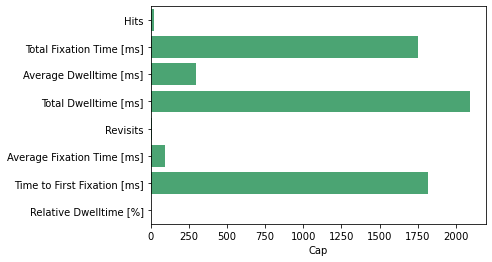

In [21]:
# test
barplot = sns.barplot(x=df.iloc[:,1], y=df.index.values, color='mediumseagreen')


#### visualisations of ooi-based ooi metrics lfg


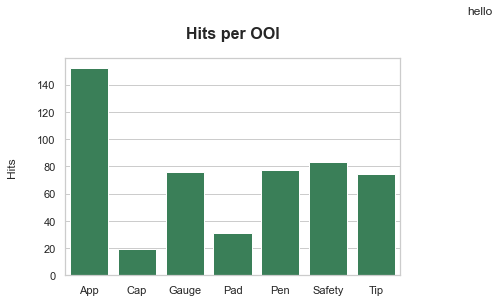

In [155]:
sns.set_theme(style='whitegrid')
#sns.color_palette('ocean')  
#sns.set_context('notebook', font_scale=1.5, rc={'lines.lineswidth':2.5})
#fig_hits = plt.figure(figsize=(8,8))
barplot = sns.barplot(x=df_ooi_metrics.columns, y=df_ooi_metrics.iloc[0], color='seagreen')
plt.title('{} per OOI'.format(df_ooi_metrics.index[0]), fontsize = 16, pad = 20, weight = 'bold')
plt.ylabel(df_ooi_metrics.index[0],  labelpad=20)
plt.text(1.1,1.1, 'hello', transform=plt.gca().transAxes)
plt.show()
fig = barplot.get_figure()
fig.savefig('Output/testimage.png', bbox_inches='tight', dpi=300)

In [173]:
piedata = df_ooi_metrics.loc['Relative Dwelltime [%]']
plt.clf()
savepath='Output/{}_pieplot_{}.jpg'.format(['Relative Dwelltime [%]'], 'Whole Trial')
number_cols = len(piedata.columns)
clrs = sns.color_palette('Greens')[0:number_cols]
lbls = piedata.columns
plt.pie(piedata.loc['Relative Dwelltime [%]'], labels = lbls, colors = clrs, autopct='%.0f%%')
plt.savefig(savepath, bbox_inches = 'tight', dpi = 300)


AttributeError: 'numpy.int64' object has no attribute 'eq'

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


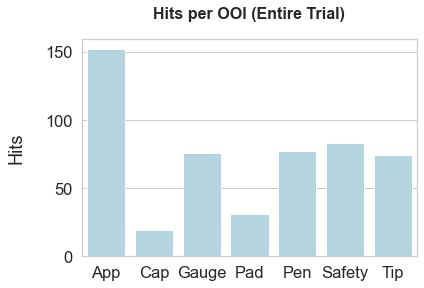

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


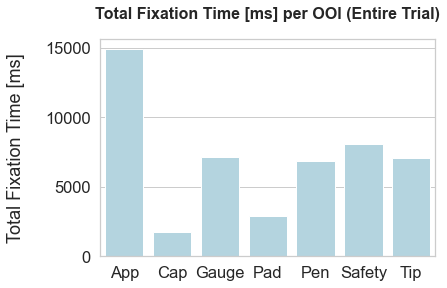

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


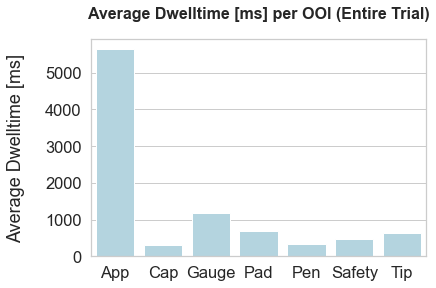

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


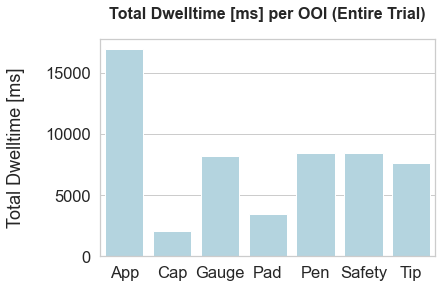

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


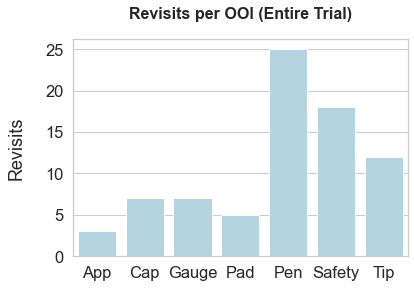

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


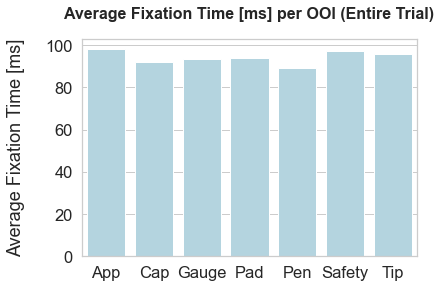

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


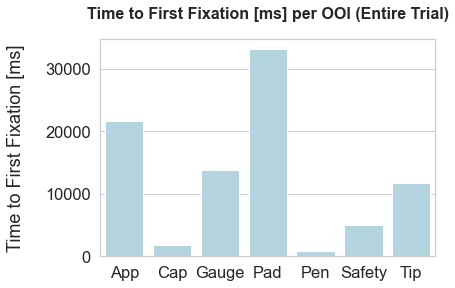

c:\Users\renee\anaconda3\envs\OGD_HMM\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


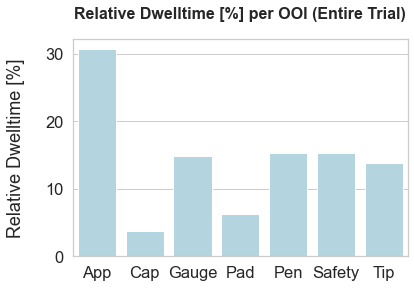

<Figure size 432x288 with 0 Axes>

In [143]:
titleaddon = 'Entire Trial'
for i in range(len(df_ooi_metrics)):
    sns.set_theme(style='whitegrid')
    #sns.color_palette('ocean')  
    sns.set_context('notebook', font_scale=1.5, rc={'lines.lineswidth':2.5})
    #fig_hits = plt.figure(figsize=(8,8))
    barplot = sns.barplot(df_ooi_metrics.columns, df_ooi_metrics.iloc[i], color='lightblue')
    plt.title('{} per OOI ({})'.format(df_ooi_metrics.index[i], titleaddon), fontsize = 16, pad = 20, weight = 'bold')
    plt.ylabel(df_ooi_metrics.index[i],  labelpad=20)
    plt.show()
    fig = barplot.get_figure()
    fig.savefig('Output/testimage_{}.png'.format(i), format = 'png')
    plt.clf()
 


In [ ]:
# hits
sns.set_theme(style='whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.lineswidth':2.5})
fig_hits = plt.figure(figsize=(8,8))
sns.barplot(df_general_ooi_metrics.columns, df_general_ooi_metrics.loc['Hits'], color='lightblue')
#plt.bar(df_general_ooi_metrics.columns, df_general_ooi_metrics.loc['Hits'], color='lightblue')
plt.title('Hits per OOI', fontsize = 16, pad = 20, weight = 'bold')
plt.ylabel('Number of hits',  labelpad=20)
#plt.xlabel('OOI', labelpad=20)
plt.show()

In [ ]:
# total fixation time
sns.set_theme(style='whitegrid')
fig_hits = plt.figure(figsize=(8,8))
plt.bar(df_general_ooi_metrics.columns, df_general_ooi_metrics.loc['Total Fixation Time [ms]'], color='lightblue')
plt.title('Total Fixation Time', fontsize = 16)
plt.ylabel('Total Fixation Time [ms]', weight = 'bold')
plt.xlabel('OOI', weight = 'bold')
plt.show()